# 1. Importing libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)
df=pd.read_csv('~/Documents/Naukri Kaggle/Datasets/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv')

In [3]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


# 2. Data wrangling

Let us check the type of data which we are given with.

In [4]:
df.dtypes

Uniq Id                    object
Crawl Timestamp            object
Job Title                  object
Job Salary                 object
Job Experience Required    object
Key Skills                 object
Role Category              object
Location                   object
Functional Area            object
Industry                   object
Role                       object
dtype: object

As we can see, all the data types have been encoded as objects. However, upon eyeballing into the data, we clearly see that we have some data that will be preferred to be in another form. For example, it will be better if we change the Crawl Timestamp into timestamp datatype. Similarly, the Job Experience column and salary can be shown as integer datatypes.

## Converting the crawl timestamp column into timestamp datatype

Let us remove the unwanted **+0000** in the timestamp column first.

In [5]:
for i in range(len(df)):
    df['Crawl Timestamp'][i]=df['Crawl Timestamp'][i].replace('+0000','')
    i+=1

In [6]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


As we can see, the timestamp is in a more understandable form and can be converted into the required timestamp data frame using pandas.to_datetime method .

In [7]:
df['Crawl Timestamp']=pd.to_datetime(df['Crawl Timestamp'])

In [8]:
df['Crawl Timestamp'][:5]

0   2019-07-05 01:46:07
1   2019-07-06 08:04:50
2   2019-08-05 15:50:44
3   2019-08-05 15:31:56
4   2019-07-05 02:48:29
Name: Crawl Timestamp, dtype: datetime64[ns]

As we can see, the above Crawl Timestamp column is in the required datetime format.

## Missing values

We need to check for the presence of any missing values and take care of these missing values. In this case, we will simply drop the missing values as we are primarily dealing with data visualisation and dropping few entries will not severly harm any calculations.

In [9]:
df.isna().any()

Uniq Id                    False
Crawl Timestamp            False
Job Title                   True
Job Salary                  True
Job Experience Required     True
Key Skills                  True
Role Category               True
Location                    True
Functional Area             True
Industry                    True
Role                        True
dtype: bool

Let us check the pattern and frequency of missing values in each column using a seaborn heatmap.

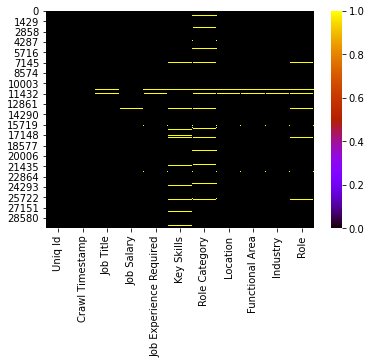

In [10]:
sns.heatmap(df.isnull(),cbar=True,cmap='gnuplot')

As we can clearly see, columns such as key skills and role category have the most amount of missing values. Let us see how many exactly are missing.

In [11]:
cols=[ 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role']
empty_vals=[]
for col in cols:
    print('Number of missing values in {}: {}'.format(col,df[col].isna().value_counts()[1]))
    empty_vals.append(df[col].isna().value_counts()[1])
print('Total entries:{}'.format(len(df)))

Number of missing values in Job Title: 575
Number of missing values in Job Salary: 50
Number of missing values in Job Experience Required: 573
Number of missing values in Key Skills: 1271
Number of missing values in Role Category: 2305
Number of missing values in Location: 577
Number of missing values in Functional Area: 573
Number of missing values in Industry: 573
Number of missing values in Role: 901
Total entries:30000


In [12]:
missing_df=pd.DataFrame(columns=['Column','Missing values'])
missing_df['Column']=cols
missing_df['Missing values']=empty_vals
missing_df.sort_values(by='Missing values',inplace=True,ascending=False)
missing_df.index=missing_df.Column
missing_df.drop('Column',axis=1,inplace=True)
missing_df

,Missing values
Column,
Role Category,2305
Key Skills,1271
Role,901
Location,577
Job Title,575
Job Experience Required,573
Functional Area,573
Industry,573
Job Salary,50


/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1320: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


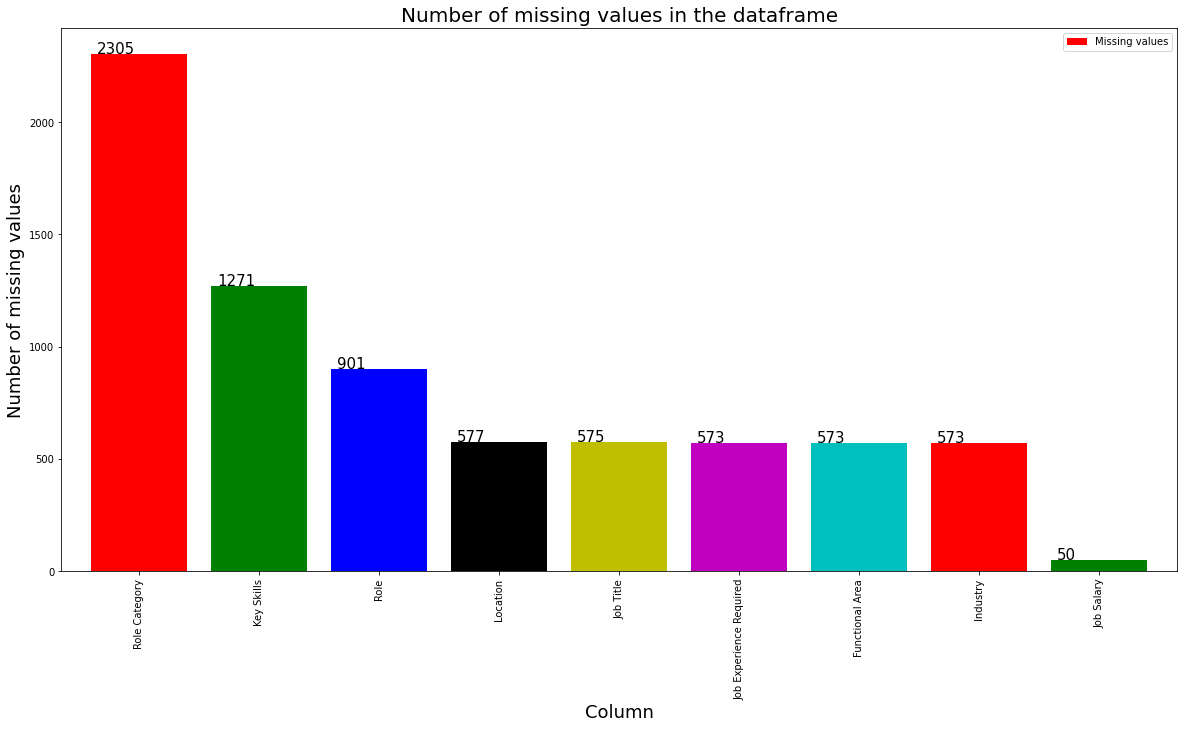

In [13]:
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
ax=missing_df.plot(kind='bar',figsize=(20,10),rot=90,width=0.8,color=my_colors)
ax.set_title("Number of missing values in the dataframe",size=20)
ax.set_ylabel('Number of missing values',size=18)
ax.set_xlabel('Column',size=18)


#For annotating the bars

for i in ax.patches:
    ax.text(i.get_x()+0.045,i.get_height()+2,str(round((i.get_height()), 2)),
            rotation=0,fontsize=15,color='black')
    


The above plot makes it even easier to understand which fields have high missing values.

As we can see, the number of missing values in each column is not much. Even if we drop all the missing values, we should be able to get a good deptiction of the general data trend. Let us now drop all the missing values in the dataframe.

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.isna().any()

Uniq Id                    False
Crawl Timestamp            False
Job Title                  False
Job Salary                 False
Job Experience Required    False
Key Skills                 False
Role Category              False
Location                   False
Functional Area            False
Industry                   False
Role                       False
dtype: bool

In [16]:
df.size

297055

As we can see, the size of the dataframe reduced from 30000 to 297055. The loss of data isn't much and can be worked with now.

## Job Title

Let us check the job title field to see any intersting insights and perform the much required data cleaning which is to be done.

In [17]:
df['Job Title'].describe()

count                27005
unique               21849
top        Sales Executive
freq                   118
Name: Job Title, dtype: object

In [18]:
df['Job Title'].value_counts()

 Sales Executive                                                                 118
 PHP Developer                                                                   117
 Business Development Executive                                                  116
 Business Development Manager                                                     97
 Software Engineer                                                                77
 Graphic Designer                                                                 77
 Android Developer                                                                76
 Content Writer                                                                   74
 Java Developer                                                                   73
 Sales Manager                                                                    71
 Senior Software Engineer                                                         61
 Business Analyst                                                

As we can see, the column is extremely unclean here. We must find some way to group these job titles into a common and easily understandable blocks.

In [19]:
df_temp=df.copy()

Here, what we plan to do is find keywords such as engineer, analyst,HR, executive ,customer care and then replace the other words with these common job roles to align the data we have. Let us make the important list of keywords that we plan to use for sorting the data.



In [20]:
df_temp.loc[df_temp['Job Title'].str.contains('Planner', case=False), 'Cleaned Title'] = 'Planner'

In [40]:
df_temp.loc[df_temp['Job Title'].str.contains('Analyst', case=False), 'Cleaned Title'] = 'Analyst'
df_temp.loc[df_temp['Job Title'].str.contains('Analytics', case=False), 'Cleaned Title'] = 'Analyst'
df_temp.loc[df_temp['Job Title'].str.contains('Develop',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('Software',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('Web',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('App',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('Designer', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Job Title'].str.contains('Animation', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Job Title'].str.contains('Content', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Job Title'].str.contains('Consultant', case=False), 'Cleaned Title'] = 'Consultancy'
df_temp.loc[df_temp['Job Title'].str.contains('Risk', case=False), 'Cleaned Title'] = 'Risk analyst'
df_temp.loc[df_temp['Job Title'].str.contains('Call', case=False), 'Cleaned Title'] = 'Customer service'
df_temp.loc[df_temp['Job Title'].str.contains('Support',case=False),'Cleaned Title']='Customer service'
df_temp.loc[df_temp['Job Title'].str.contains('Customer support',case=False),'Cleaned Title']='Customer service'
df_temp.loc[df_temp['Job Title'].str.contains('Engineer',case=False),'Cleaned Title']='Core engineering'
df_temp.loc[df_temp['Job Title'].str.contains('Tech',case=False),'Cleaned Title']='Core engineering'

In [41]:
df_temp.loc[df_temp['Job Title'].str.contains('Prof',case=False),'Cleaned Title']='Academic role'
df_temp.loc[df_temp['Job Title'].str.contains('Business',case=False),'Cleaned Title']='Business Developer/Intelligence'
df_temp.loc[df_temp['Job Title'].str.contains('Social Media',case=False),'Cleaned Title']='Public Relations'
df_temp.loc[df_temp['Job Title'].str.contains('HR',case=False),'Cleaned Title']='Human Resources'
df_temp.loc[df_temp['Job Title'].str.contains('HR Executive',case=False),'Cleaned Title']='Human Resources'
df_temp.loc[df_temp['Job Title'].str.contains('Manager',case=False),'Cleaned Title']='Managerial role'
df_temp.loc[df_temp['Job Title'].str.contains('Fresher',case=False),'Cleaned Title']='Fresher role'
df_temp.loc[df_temp['Job Title'].str.contains('Account',case=False),'Cleaned Title']='Accounting role'
df_temp.loc[df_temp['Job Title'].str.contains('Intern',case=False),'Cleaned Title']='Internships'
df_temp.loc[df_temp['Job Title'].str.contains('Placement',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Job Title'].str.contains('Liaison',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Job Title'].str.contains('Recruit',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Job Title'].str.contains('Data',case=False),'Cleaned Title']='Data Science'
df_temp.loc[df_temp['Job Title'].str.contains('Sale',case=False),'Cleaned Title']='Sales Executive'
df_temp.loc[df_temp['Job Title'].str.contains('Health',case=False),'Cleaned Title']='Health Care'
df_temp.loc[df_temp['Job Title'].str.contains('Quality',case=False),'Cleaned Title']='Quality Control'
df_temp.loc[df_temp['Job Title'].str.contains('Tele',case=False),'Cleaned Title']='Telemarketing'


In [42]:
df_temp['Cleaned Title'].value_counts()

Software/Web/App Developer         3744
Core engineering                   3599
Managerial role                    3102
Sales Executive                    2527
Design and Creativity               799
Accounting role                     798
Business Developer/Intelligence     676
Data Science                        662
Placement & Liaison                 550
Internships                         550
Consultancy                         518
Fresher role                        445
Human Resources                     386
Analyst                             385
Customer service                    371
Academic role                       364
Telemarketing                       287
Quality Control                     242
Health Care                         102
Public Relations                     49
Risk analyst                         46
Planner                              14
Name: Cleaned Title, dtype: int64

In [43]:
df_temp['Cleaned Title'].isna().value_counts()

False    20216
True      6789
Name: Cleaned Title, dtype: int64

As it can be seen, we were successful to clean about 20,000 entries by using keywords of each entry and entering them into various known roles. The remaining entries couldn't be captured into any of the known roles. Hence, we will simply drop these entries.

In [45]:
df_temp.dropna(inplace=True)

Let us drop the unclean Job Title column and replace it by the new cleaned title column

In [47]:
df_temp.drop('Job Title',axis=1,inplace=True)

In [52]:
df_temp=df_temp[['Uniq Id', 'Crawl Timestamp', 'Cleaned Title','Job Salary', 'Job Experience Required',
       'Key Skills', 'Role Category', 'Location', 'Functional Area',
       'Industry', 'Role']]

In [53]:
df_temp.rename(columns={'Cleaned Title':'Job Title'},inplace=True)

In [54]:
df_temp.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07,Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44,Core engineering,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56,Core engineering,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29,Core engineering,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
5,c9628ea8d9cfd2ca72e14d53783aca90,2019-08-05 03:59:27,Analyst,"7,00,000 - 17,00,000 PA.",5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",System Analyst
